# Exploring Star Clusters in Gaia data with Pandas


## Introduction

Young star clusters and stellar associations are important sites for understanding the stellar birth environment and stellar evolution. The Gaia mission will provide the 3D location and proper motions for over 1 billion stars, making it the perfect telescope to discover new star clusters and further characterize known clusters.

In this challenge, you'll be using [NumPy](http://www.numpy.org), [Matplotlib](https://matplotlib.org), and [Pandas](http://pandas.pydata.org) to explore a piece of the initial Gaia data release using pandas.

## The Data
This dataset combines Hipparcos and Tycho-2 data with new Gaia observations to provide accurate 3D positions and proper motions (i.e., the 2D angular velocity) on the sky (no radial velocities yet).

For this exercise, we've collected the relevant data and stored it in the HDF5 data file, <em>alldata.hdf</em>, which you will should download from [here](http://doi.org/10.5281/zenodo.569876).

If you are interested, the full datasets can be downloaded in chunks from the Gaia website, [here](http://cdn.gea.esac.esa.int/Gaia/tgas_source/). A description of all of the columns can be found [here](https://gaia.esac.esa.int/documentation/GDR1/datamodel/Ch1/tgas_source.html).

<strong>Load the data by reading it in with Pandas.</strong>

In [1]:
# Load data into DataFrame named 'dat'
import pandas as pd
dat  = pd.read_hdf('alldata.hdf')

You can think of this simple Pandas DataFrame as a large table which has built in functions to process rows and columns, read and write to many different formats on disk, and interact with other DataFrames.

<strong>Try printing the DataFrame to see a small sample. You'll have to scroll down to view it all.</strong>

In [2]:
print dat

                 source_id  ref_epoch          ra  ra_error       dec  \
0            7627862074752     2015.0   45.034330  0.305989  0.235392   
1            9277129363072     2015.0   45.165007  2.583882  0.200068   
2           13297218905216     2015.0   45.086155  0.213836  0.248825   
3           13469017597184     2015.0   45.066542  0.276039  0.248211   
4           15736760328576     2015.0   45.136038  0.170697  0.335044   
5           16527034310784     2015.0   45.141378  0.205008  0.359618   
6           16733192740608     2015.0   45.152959  0.189524  0.386343   
7           16870631694208     2015.0   45.112779  0.206981  0.380844   
8           26834955821312     2015.0   45.010270  0.243576  0.351099   
9           33260226885120     2015.0   44.974659  0.267911  0.473472   
10          44358422235136     2015.0   45.501447  0.134010  0.497704   
11          51745765982848     2015.0   45.467165  0.146028  0.655080   
12          82463372227072     2015.0   44.866247  

We see that we have 2,057,050 stars in our dataset, each of which has a measured position on the sky (both (ra,dec) and (l,b)), a parallax, a G band magnitude, and proper motion on the sky (pmra,pmdec). Each of these measurements also has an error associated with it.

(By the way - in a moment, we'll be plotting the values ra [right ascension], dec [declination] and parallax - if you're interested in learning more about these quantities, see this Wikipedia page on [Star Positions](https://en.wikipedia.org/wiki/Star_position), as well as references therein.) 

We can see how much memory our DataFrame object is taking up with,

In [5]:
print('{:d} rows'.format(len(dat)))
print('{:.1f} MB'.format(dat.memory_usage(index=True,deep=True).sum()/1e6))

2057050 rows
115.2 MB


We can try reducing this by only loading in the columns we'll be working with, which are <em>'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error'</em>

<strong>In the cell below:

1. Re-load the data to the same DataFrame (named dat), this time only the 6 columns above

2. Note how much the size of the DataFrame has been reduced compared to the original</strong>


In [6]:
dat  = pd.read_hdf('alldata.hdf',columns=['ra','ra_error','dec','dec_error','parallax','parallax_error'])
print('{:d} rows'.format(len(dat)))
print('{:.1f} MB'.format(dat.memory_usage(index=True,deep=True).sum()/1e6))

print(dat)

2057050 rows
115.2 MB
               ra  ra_error       dec  dec_error   parallax  parallax_error
0       45.034330  0.305989  0.235392   0.218802   6.352951        0.307910
1       45.165007  2.583882  0.200068   1.197789   3.900329        0.323488
2       45.086155  0.213836  0.248825   0.180326   3.155313        0.273484
3       45.066542  0.276039  0.248211   0.200958   2.292367        0.280972
4       45.136038  0.170697  0.335044   0.170130   1.582077        0.261539
5       45.141378  0.205008  0.359618   0.179848   8.663080        0.255867
6       45.152959  0.189524  0.386343   0.171880   5.698205        0.263677
7       45.112779  0.206981  0.380844   0.150943   2.090812        0.222206
8       45.010270  0.243576  0.351099   0.169345   6.202492        0.247253
9       44.974659  0.267911  0.473472   0.163531   1.677673        0.222067
10      45.501447  0.134010  0.497704   0.395606   9.957504        0.547771
11      45.467165  0.146028  0.655080   0.151794   5.032630       

The DataFrame object contains some built-in convienence functions for quickly getting a sense of your data. For example, we can quickly make histograms of different columns with the <code>dat.hist()</code> method.

<strong>Plot histograms of the 'ra', 'dec' and 'parallax' columns by filling in the missing code below:</strong>

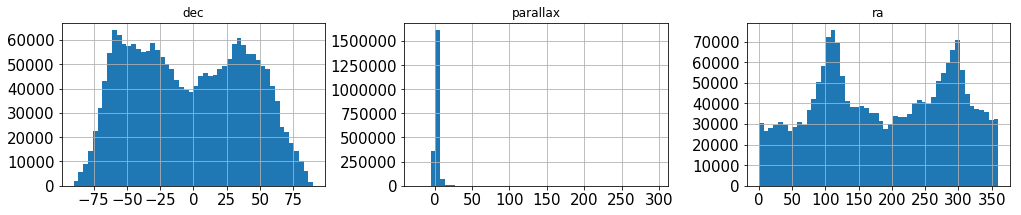

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axes = plt.subplots(1,3,figsize=(17,3))
dat.hist(['ra','dec','parallax'],ax=axes,xlabelsize=15,ylabelsize=15,bins=50);

We can see right away that Gaia is an all sky survey as it covers the full range of right ascension and declination. The parallax histogram looks a little funny though. There seems to be some bad parallax data that we should remove before proceeding. Remember that parallax is related to distance via

$$\text{distance in pc} = 1 / (\text{parallax in arcsec}) .$$

The Gaia parallaxes are reported in milliarcsec, and so the distances will be in kpc. From looking at the histogram for parallax we see a problem—there are a number of negative parallaxes, which would correspond to negative distances. 


<strong><em>Verify this by slicing our DataFrame object to only show the rows where the parallax is negative</em></strong>

In [8]:
dat.parallax[dat.parallax<0]

783     -0.012890
810     -0.014806
1031    -1.407067
1245    -0.298734
2443    -0.133778
3822    -0.224989
3897    -0.111915
4086    -0.572870
4191    -0.261065
4530    -2.472477
4988    -0.291551
5100    -0.532618
5270    -0.325832
5632    -0.255108
7086    -0.152013
7334    -0.159963
7482    -0.052431
7829    -1.705954
8084    -0.643785
8443    -0.481137
8538    -0.564561
9387    -0.039135
9542    -0.332213
9880    -1.021263
9934    -0.190852
10041   -0.349588
10115   -0.262956
10179   -1.378886
10377   -0.804147
11359   -0.381682
           ...   
33448   -0.672482
33458   -0.155961
33477   -0.269706
33489   -0.048324
33509   -0.055059
33524   -0.347159
33546   -0.573623
33560   -0.240922
33573   -0.789527
33604   -2.044536
33620   -1.649397
33624   -0.327885
33675   -0.019779
33706   -0.255225
33716   -0.032160
33726   -0.582164
33730   -0.928917
33739   -0.227645
33747   -0.184599
33764   -0.001552
33785   -0.316290
33800   -1.053046
33804   -0.123523
33821   -1.540204
33856   -1

<strong><em>Now, remove these by using the dat.drop( ) method, and re-plot the three histograms</em></strong>

1633156 rows
91.5 MB


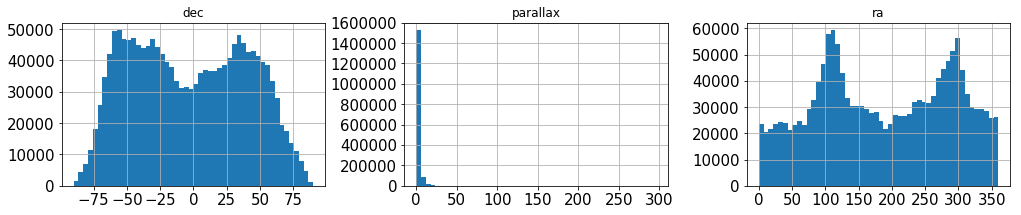

In [9]:
dat = dat.drop(dat[dat.parallax < 0].index)
print('{:d} rows'.format(len(dat)))
print('{:.1f} MB'.format(dat.memory_usage(index=True,deep=True).sum()/1e6))
fig,axes = plt.subplots(1,3,figsize=(17,3))
dat.hist(['ra','dec','parallax'],ax=axes,xlabelsize=15,ylabelsize=15,bins=50);

Looks better!

# Module 4 Quiz

Ok, now you've got some interesting data loaded into your DataFrame. The following will guide you through the quiz questions for this module, which also appear on the Module 4 Quiz page on Canvas. Feel free to bounce back and forth between this notebook and the Quiz page as needed. 

<strong>Be sure you submit all your answers to the Quiz on Canvas to get credit for completing the module!</strong>

### Question 1
<strong>After removing the negative parallax values, how many stars remain in the sample?</strong>

In [18]:
# Just to be safe, let's reload the 6 columns as before
dat  = pd.read_hdf('alldata.hdf',columns=['ra','ra_error','dec','dec_error','parallax','parallax_error'])
dat = dat.drop(dat[dat.parallax < 0].index)
print('{:d} rows'.format(len(dat)))

1633156 rows


### Question 2
<strong>Add a new column to the DataFrame called 'dist' that contains the distances to the stars in kpc</strong>, computed from the parallax column using the relationship between distance and parallax (note that the parallax values are in milliarcseconds, which means distances will be in kpc).

<strong>What is the distance to the nearest star in the sample, and what is the mean distance of all the stars?</strong>

In [11]:
dat["dist"] = 1./(dat["parallax"])
dat.describe()

,ra,ra_error,dec,dec_error,parallax,parallax_error,dist
count,1.633156e+06,1.633156e+06,1.633156e+06,1.633156e+06,1.633156e+06,1.633156e+06,1.633156e+06
mean,1.872923e+02,3.439942e-01,-3.227064e+00,3.145105e-01,2.519243e+00,3.819154e-01,1.569252e+00
std,1.001260e+02,3.684276e-01,4.314274e+01,3.595871e-01,2.913484e+00,1.671698e-01,4.180004e+02
min,4.286649e-04,3.532308e-02,-8.988970e+01,3.801274e-02,1.885419e-06,2.048801e-01,3.380621e-03
25%,1.046439e+02,1.824553e-01,-4.135725e+01,1.771338e-01,1.060386e+00,2.676167e-01,3.288752e-01
50%,1.838041e+02,2.525673e-01,-4.636008e+00,2.326106e-01,1.804167e+00,3.204352e-01,5.542724e-01
75%,2.801952e+02,3.932393e-01,3.437238e+01,3.378142e-01,3.040667e+00,4.309556e-01,9.430526e-01
max,3.599999e+02,1.816945e+01,8.983235e+01,1.852811e+01,2.958036e+02,9.999978e-01,5.303861e+05


### Question 3
Let's visualize the 2D positions of the stars in our sample. Create a simple scatter plot of the <em>ra</em> and <em>dec</em> values using <code>dat.plot.scatter(VALUES TO PLOT)</code>. 

<strong>What observation can you make about the dataset from this plot?</strong>

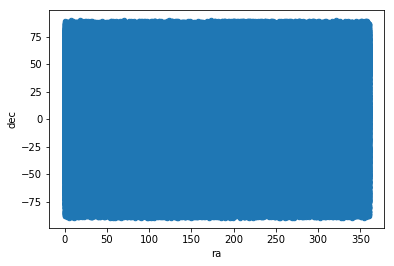

In [12]:
dat.plot.scatter(x='ra', y='dec')

Well, that didn't tell us much!

### Question 4
Another way to visualize this data is to create a 2D histogram and represent it as a <em>colormap</em>. Instead of viewing the positions of individual stars, we view it as a density distribution of the stars. 
One of the methods of doing this is with the pyplot function <em>hexbin</em>, which you can learn more about here: [hexbin demo](http://matplotlib.org/1.4.0/examples/pylab_examples/hexbin_demo.html) 

Create a new plot by replacing "scatter" with "hexbin." Then play around with the attributes to get a really cool looking plot: Try setting <code>gridsize</code> to values between 30 and 300 (you'll see a noticeable difference). To adjust the colors, try&nbsp;setting&nbsp;<code>cmap</code> equal to "inferno" or "gray," or visit this page to learn more about [choosing colormaps](https://matplotlib.org/users/colormaps.html).

<strong>How would you describe the shape of the stellar density distribution you obtain? By the way, what you're seeing is the Milky Way through the eyes of Gaia!</strong>


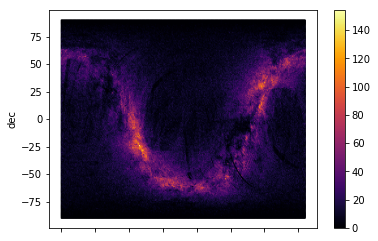

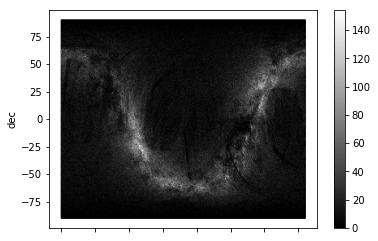

In [13]:
dat.plot.hexbin('ra', 'dec', gridsize=300, cmap='inferno')
dat.plot.hexbin('ra', 'dec', gridsize=300, cmap='gray')

## That completes Module 4!

Make sure you complete Quiz 4 on Canvas! Upon submission, you'll be able to download a solution to this Challenge.